In [30]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

import seaborn 

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
data = pd.read_csv("Laptop_data.csv")
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,0,1024,Windows,...,15.6,1,No,No,23990,26990,11,3.8,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,512,0,Windows,...,15.6,1,No,No,37990,50990,25,4.3,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.1,1,No,No,32890,46990,30,3.9,28,4
3,HP,Core,Intel,Core i3,11th,8,DDR4,512,0,Windows,...,15.6,1,No,Yes,42990,57330,25,4.4,158,18
4,HP,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,15.6,0,No,No,54990,70171,21,4.2,116,15


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   895 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           871 non-null    object 
 6   ram_type         871 non-null    object 
 7   ssd              896 non-null    int64  
 8   hdd              896 non-null    int64  
 9   os               896 non-null    object 
 10  os_bit           896 non-null    int64  
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [4]:
data = data.drop('msoffice', 1)
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,display_size,warranty,Touchscreen,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,0,1024,Windows,...,Casual,15.6,1,No,23990,26990,11,3.8,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,512,0,Windows,...,Casual,15.6,1,No,37990,50990,25,4.3,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,Casual,14.1,1,No,32890,46990,30,3.9,28,4
3,HP,Core,Intel,Core i3,11th,8,DDR4,512,0,Windows,...,ThinNlight,15.6,1,No,42990,57330,25,4.4,158,18
4,HP,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,ThinNlight,15.6,0,No,54990,70171,21,4.2,116,15


In [5]:
print(data['ram_gb'].unique())
data = data.drop('ram_gb',1)
data = data.drop('os',1)
data = data.drop('Touchscreen',1)

#pd.to_numeric(data['ram_gb'])
data.info()

['4' '8' '16' '5' nan '32' '15.6' 'Dual' 'NVIDIA' 'Acer' 'Pre-installed'
 'Full' 'Intel' 'Access']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   895 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_type         871 non-null    object 
 6   ssd              896 non-null    int64  
 7   hdd              896 non-null    int64  
 8   os_bit           896 non-null    int64  
 9   graphic_card_gb  896 non-null    int64  
 10  weight           896 non-null    object 
 11  display_size     896 non-null    object 
 12  warranty         896 non-null    int64  
 13  latest_price     896 non-null    int64  
 14  old_price        896 non-null    int64  
 15  discount 

In [6]:
data[data['processor_name'].isna()]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_type,ssd,hdd,os_bit,graphic_card_gb,weight,display_size,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
52,acer,Aspire,AMD,NaN,Missing,NaN,0,0,32,4,Casual,0,0,54990,89000,38,4.5,3190,414


In [7]:
data = data.drop(52,0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 895
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            895 non-null    object 
 1   model            895 non-null    object 
 2   processor_brand  895 non-null    object 
 3   processor_name   895 non-null    object 
 4   processor_gnrtn  895 non-null    object 
 5   ram_type         871 non-null    object 
 6   ssd              895 non-null    int64  
 7   hdd              895 non-null    int64  
 8   os_bit           895 non-null    int64  
 9   graphic_card_gb  895 non-null    int64  
 10  weight           895 non-null    object 
 11  display_size     895 non-null    object 
 12  warranty         895 non-null    int64  
 13  latest_price     895 non-null    int64  
 14  old_price        895 non-null    int64  
 15  discount         895 non-null    int64  
 16  star_rating      895 non-null    float64
 17  ratings         

In [8]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_type,ssd,hdd,os_bit,graphic_card_gb,weight,display_size,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,DDR4,0,1024,64,0,Casual,15.6,1,23990,26990,11,3.8,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,DDR4,512,0,64,0,Casual,15.6,1,37990,50990,25,4.3,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,DDR4,0,1024,64,0,Casual,14.1,1,32890,46990,30,3.9,28,4
3,HP,Core,Intel,Core i3,11th,DDR4,512,0,64,0,ThinNlight,15.6,1,42990,57330,25,4.4,158,18
4,HP,Core,Intel,Core i5,11th,DDR4,512,0,64,0,ThinNlight,15.6,0,54990,70171,21,4.2,116,15


In [9]:
print(data['ram_type'].unique())
data['ram_type'] = data['ram_type'].replace({'DDR4':0,'DDR5':1,'LPDDR4X':2,'LPDDR4':3, 'Unified':4, 'Full':5, 'LPDDR3':6, 'DDR3':7, 'Cooling':8, 'GTX':9, 'Master':10, 'Windows':11, 'LED':12, 'i5':13, 'Apps':14 })
data.head()

['DDR4' 'DDR5' 'LPDDR4X' nan 'LPDDR4' 'Unified' 'Full' 'LPDDR3' 'DDR3'
 'Cooling' 'GTX' 'Master' 'Windows' 'LED' 'i5' 'Apps']


,brand,model,processor_brand,processor_name,processor_gnrtn,ram_type,ssd,hdd,os_bit,graphic_card_gb,weight,display_size,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,0.0,0,1024,64,0,Casual,15.6,1,23990,26990,11,3.8,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,0.0,512,0,64,0,Casual,15.6,1,37990,50990,25,4.3,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,0.0,0,1024,64,0,Casual,14.1,1,32890,46990,30,3.9,28,4
3,HP,Core,Intel,Core i3,11th,0.0,512,0,64,0,ThinNlight,15.6,1,42990,57330,25,4.4,158,18
4,HP,Core,Intel,Core i5,11th,0.0,512,0,64,0,ThinNlight,15.6,0,54990,70171,21,4.2,116,15


In [10]:
data['ram_type'].fillna((data['ram_type'].median()), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 895
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            895 non-null    object 
 1   model            895 non-null    object 
 2   processor_brand  895 non-null    object 
 3   processor_name   895 non-null    object 
 4   processor_gnrtn  895 non-null    object 
 5   ram_type         895 non-null    float64
 6   ssd              895 non-null    int64  
 7   hdd              895 non-null    int64  
 8   os_bit           895 non-null    int64  
 9   graphic_card_gb  895 non-null    int64  
 10  weight           895 non-null    object 
 11  display_size     895 non-null    object 
 12  warranty         895 non-null    int64  
 13  latest_price     895 non-null    int64  
 14  old_price        895 non-null    int64  
 15  discount         895 non-null    int64  
 16  star_rating      895 non-null    float64
 17  ratings         

In [11]:
data['brand'].unique()
data['brand'] = data['brand'].replace({'ASUS':0,'HP':1,'Lenovo':2, 'DELL':3, 'APPLE':4, 'acer':5, 'MSI':6, 'realme':7, 'RedmiBook':8,
                                      'Nokia':9,'lenovo':10,'Infinix':11,'Mi':12,'ALIENWARE':13,'SAMSUNG':14,'MICROSOFT':15,'LG':16,
                                      'Vaio':17, 'Smartron':18, 'Avita':19, 'iball':20})

In [12]:
data['model'].unique()
newValues = np.arange(0,120)
data['model'].replace(to_replace=['Celeron', 'VivoBook', 'Vivobook', 'Core', 'IdeaPad', '15s',
       'Vostro', 'Ryzen', 'Pavilion', 'Ideapad', '2020', 'Aspire',
       'Inspiron', 'GF63', 'TUF', 'Book(Slim)', '15', 'GF65', 'Book',
       'Legion', 'Modern', 'Pro', 'ThinkPad', 'PureBook', 'Swift',
       'MacBook', 'Predator', 'ASUS', 'Katana', 'Zenbook', 'Pentium',
       'Nitro', 'Pulse', 'Alpha', 'ROG', 'Bravo', 'INBook', 'ZenBook',
       'Notebook', 'HP', 'Chromebook', 'Travelmate', '15-ec1105AX',
       'Yoga', 'Spectre', 'APU', '2021', 'Thinkbook', 'X1', 'Lenovo',
       'Thinkpad', 'Intel', 'G15', 'Envy', 'EeeBook', '3000', 'x360',
       '3511', 'GE76', 'Asus', 'ThinkBook', 'Delta', 'A6-9225', 'G5',
       'INSPIRON', '14s', 'G7', 'Stealth', 'Zephyrus', 'Creator',
       'Galaxy', 'Prestige', 'XPS', 'Summit', 'GS66', 'Sword', 'OMEN',
       'Surface', 'Gram', 'Extensa', 'ExpertBook', 'Omen', 'SE', 'GP76',
       'ConceptD', 'E', 't.book', 'GP65', 'Rog', 'DELL', 'Commercial',
       'X390', 'G3', 'B50-70', 'WF65', 'F17', 'Dual', 'Spin', 'Thinpad',
       'Inpiron', 'GAMING', 'AMD', 'PURA', 'GS', 'CompBook', 'IDEAPAD',
       '430', 'Vivo', 'V15', '250-G6', '14a', 'Liber', 'DA', 'Cosmos',
       'Athlon', '15q', 'Vivobook14', 'Insprion', '250', 'v15'],
           value= newValues,
           inplace=True)

In [13]:
data['processor_brand'].unique()
data['processor_brand'].replace(to_replace=['Intel', 'AMD', 'Apple', 'MediaTek', 'NVIDIA', 'Qualcomm',
       'Pre-installed', 'First', '512', 'M.2', '64'],
           value= [0,1,2,3,4,5,6,7,8,9,10],
           inplace=True)

In [14]:
data['processor_name'].unique()
newValues = np.arange(0,35)
data['processor_name'].replace(to_replace=['Celeron Dual', 'Core i3', 'Core i5', 'Ryzen 3', 'Ryzen 5',
       'M1 Processor', 'Pentium Silver', 'i5', 'Core i7', 'Hexa Core',
       'Ryzen 7', 'i7', 'Pentium Quad', '5', 'Ryzen 9', 'Core i9',
       'APU Dual', 'Quad', 'M1 Pro', 'M1 Max', 'Core',
       'MediaTek Kompanio', 'GeForce GTX', 'A6-9225 Processor',
       'GeForce RTX', 'Snapdragon 7c', 'Dual Core', 'Genuine Windows',
       'GEFORCE RTX', 'Ever Screenpad', 'GB SSD', 'Athlon Dual',
       'Slot for', 'GB eMMC', 'Core m3'],
           value= newValues,
           inplace=True)

In [17]:
data['processor_gnrtn'].unique()
data['processor_gnrtn'].replace(to_replace=['Missing', '10th', '11th', '9th', '8th', '7th', '12th', '4th'],
           value= [0,10,11,9,8,7,12,4],
           inplace=True)

In [23]:
data['weight'].unique()
data['weight'].replace(to_replace=['Casual', 'ThinNlight', 'Gaming'],
           value= [0,1,2],
           inplace=True)

In [26]:
data['display_size'].unique()
data['display_size'].replace(to_replace=['All', '6th', '8th', 'ITW)'],
           value= ['0','6','8','1'],
           inplace=True)
data['display_size']=pd.to_numeric(data['display_size'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 895
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            895 non-null    int64  
 1   model            895 non-null    int32  
 2   processor_brand  895 non-null    int64  
 3   processor_name   895 non-null    int32  
 4   processor_gnrtn  895 non-null    int64  
 5   ram_type         895 non-null    float64
 6   ssd              895 non-null    int64  
 7   hdd              895 non-null    int64  
 8   os_bit           895 non-null    int64  
 9   graphic_card_gb  895 non-null    int64  
 10  weight           895 non-null    int64  
 11  display_size     895 non-null    float64
 12  warranty         895 non-null    int64  
 13  latest_price     895 non-null    int64  
 14  old_price        895 non-null    int64  
 15  discount         895 non-null    int64  
 16  star_rating      895 non-null    float64
 17  ratings         

In [28]:
data=(data-data.mean())/data.std()

data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_type,ssd,hdd,os_bit,graphic_card_gb,weight,display_size,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
0,-0.732083,-0.899171,-0.426829,-0.923566,-1.051791,-0.327294,-1.366596,2.075296,0.419389,-0.581351,-0.717894,0.483956,0.506884,-1.122437,-1.096723,-0.715269,0.417781,13.523338,14.021275
1,-0.732083,-0.864886,-0.426829,-0.741617,-0.222405,-0.327294,0.252202,-0.476064,0.419389,-0.581351,-0.717894,0.483956,0.506884,-0.822227,-0.666236,0.618807,0.672144,0.567384,0.459137
2,-0.732083,-0.830602,-0.426829,-0.741617,-0.222405,-0.327294,-1.366596,2.075296,0.419389,-0.581351,-0.717894,0.097094,0.506884,-0.931589,-0.737984,1.095263,0.468653,-0.304870,-0.307835
3,-0.468627,-0.796318,-0.426829,-0.741617,0.606981,-0.327294,0.252202,-0.476064,0.419389,-0.581351,1.023340,0.483956,0.506884,-0.715009,-0.552516,0.618807,0.723016,-0.186998,-0.204589
4,-0.468627,-0.796318,-0.426829,-0.559669,0.606981,-0.327294,0.252202,-0.476064,0.419389,-0.581351,1.023340,0.483956,-1.142794,-0.457685,-0.322187,0.237642,0.621271,-0.225079,-0.226713


In [37]:
pca = PCA()
pca.fit(data)
type(data)

pandas.core.frame.DataFrame

In [38]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.18633092, 0.33239653, 0.43576294, 0.51612152, 0.58250869,
       0.645011  , 0.69924366, 0.7481455 , 0.79582251, 0.83663417,
       0.87147202, 0.89901254, 0.92630528, 0.95241713, 0.96892808,
       0.9827684 , 0.99335678, 0.99911095, 1.        ])

Text(0, 0.5, 'explained variance')

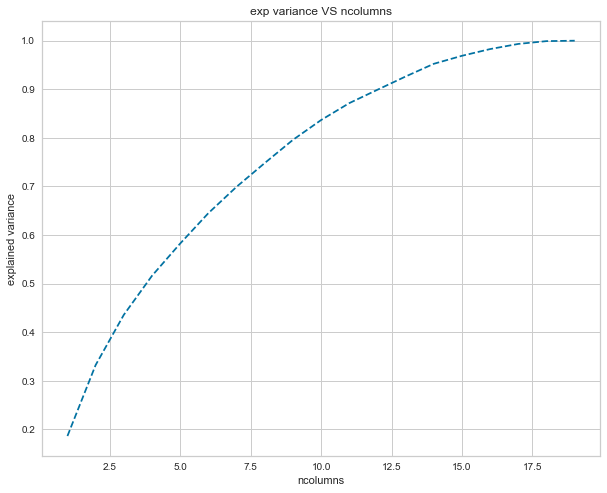

In [39]:
plt.figure(figsize=(10,8))
plt.plot(range(1,20), pca.explained_variance_ratio_.cumsum(), marker='x', linestyle="--")
plt.title('exp variance VS ncolumns')
plt.xlabel('ncolumns')
plt.ylabel('explained variance')

In [40]:
pca = PCA(n_components=10)
pca.fit(data)

PCA(n_components=10)

In [41]:
transformed_data = pca.transform(data)

In [42]:
transformed_data = pd.DataFrame(transformed_data)

In [43]:
transformed_data.columns = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10']
transformed_data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,-5.033543,10.801203,11.847793,7.688057,-5.244072,1.920164,-1.510171,-1.706479,-1.197507,3.603391
1,-1.531742,-0.038469,1.322298,-0.541037,0.176352,-0.136991,-0.864722,-0.028728,0.817341,0.004187
2,-2.243064,0.374656,-0.197335,-1.602759,-0.488844,0.316237,0.523734,1.493426,0.831046,0.916034
3,-1.738614,-0.821809,0.529290,-0.409589,1.029381,-0.357921,0.218164,-0.671098,0.356769,-0.175317
4,-1.310251,-0.587509,-0.061016,-0.352091,0.665669,-0.454634,0.550613,-1.350750,-0.197255,-0.135697


In [44]:
def kmeans(df, k):
    k_means=KMeans(n_clusters=k,random_state=42)
    k_means.fit(df)
    df['KMeans_labels']=k_means.labels_


In [45]:
def elbowMethod(df):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,10))
    visualizer.fit(df)        
    visualizer.show()
    model = AgglomerativeClustering()
    visualizer = KElbowVisualizer(model, k=(2,10))
    visualizer.fit(df)        
    visualizer.show()

In [46]:
def hierarchial_clustering(df, k):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean')
    model.fit(df)
    df['ac']=model.labels_

In [47]:
def dbscan(df,e,nsamples):
    dbscan=DBSCAN(eps=e, min_samples=nsamples)
    dbscan.fit(df)
    df['DBSCAN_labels']=dbscan.labels_ 

In [48]:
def gmm(df,n):
    gm = GaussianMixture(n)
    gm.fit(df)
    df["gm"] = gm.predict(df)

In [49]:
def calc_score(df, colname):
    score = silhouette_score(df, df[colname], metric='euclidean')
    return score

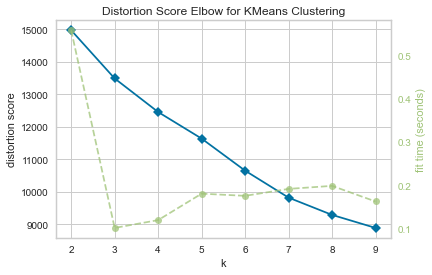

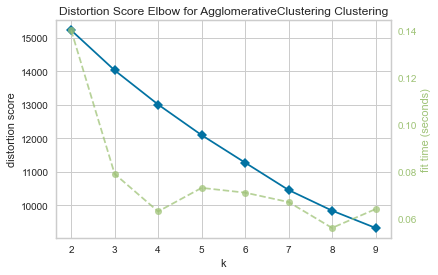

In [50]:
elbowMethod(data)

In [61]:
kmeans(data,7)
hierarchial_clustering(data,7)
dbscan(data,0.5,2)
gmm(data,4)

In [62]:
print("kmeans score: ",calc_score(data,'KMeans_labels')) 
print("Hierarchial clusterig score: ",calc_score(data,'ac')) 
print("dbscan score: ",calc_score(data,'DBSCAN_labels')) 
n_noise = list(data['DBSCAN_labels']).count(-1)
print("noise in dbscan ",n_noise)
print("gaussian mixture: ",calc_score(data,'gm')) 

kmeans score:  0.40965824661404154
Hierarchial clusterig score:  0.39666424178167786
dbscan score:  0.013461439058776654
noise in dbscan  704
gaussian mixture:  0.7043276241974594


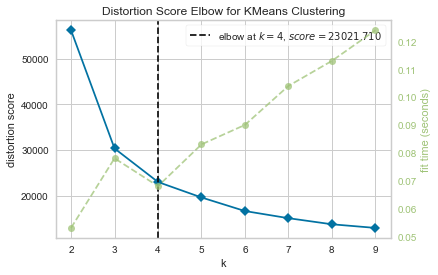

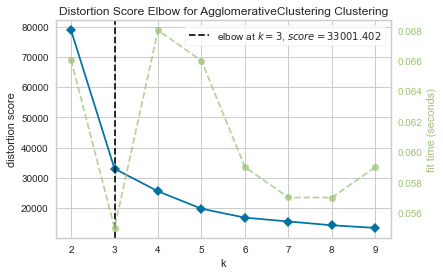

In [75]:
elbowMethod(transformed_data)

In [76]:
kmeans(transformed_data,4)
hierarchial_clustering(transformed_data,3)
dbscan(transformed_data,0.4,2)
gmm(transformed_data,2)

In [77]:
print("kmeans score: ",calc_score(transformed_data,'KMeans_labels')) 
print("Hierarchial clusterig score: ",calc_score(transformed_data,'ac')) 
print("dbscan score: ",calc_score(transformed_data,'DBSCAN_labels')) 
n_noise = list(data['DBSCAN_labels']).count(-1)
print("noise in dbscan ",n_noise)
print("gaussian mixture: ",calc_score(transformed_data,'gm')) 

kmeans score:  0.6918544964698402
Hierarchial clusterig score:  0.7080795247772036
dbscan score:  0.02627332800281491
noise in dbscan  704
gaussian mixture:  0.7706359407250326
